<a href="https://colab.research.google.com/github/XUE985/CV_EMSSE/blob/main/Exercise/Exercise%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 1: IMAGE PREPROCESSING

Module 1: Image Preprocessing
Christian Mata, PhD

# Exercise 1

**Before starting:**

- Create a GitHub repository to upload the solution of this exercise.
- Share this GitHub link to your professor.

**Objectives**

Generate a single Python notebook implementing and answering the following questions:

**- Task 1:** Load the built-in image 'coffee' of the skimage libraries. Details can be found at https://scikit-image.org/docs/stable/auto_examples/data/plot_general.html#sphx-glr-auto-examples-data-plot-general-py

**- Task 2:** Use the skimage function random_noise to add each of the 7 different types of noise available and generate a 4x2 panel figure with the original image and the 7 corrupted versions. The noise types are:

* ‘gaussian’ Gaussian-distributed additive noise.
* ‘localvar’ Gaussian-distributed additive noise, with specified
local variance at each point of image.
* ‘poisson’ Poisson-distributed noise generated from the data.
* ‘salt’ Replaces random pixels with 1.
* ‘pepper’ Replaces random pixels with 0 (for unsigned images) or
-1 (for signed images).
* ‘s&p’ Replaces random pixels with either 1 or low_val, where
low_val is 0 for unsigned images or -1 for signed images.
* ‘speckle’ Multiplicative noise using out = image + n*image, where
n is Gaussian noise with specified mean & variance.

Documentation of the function can be found at
https://scikit-image.org/docs/stable/api/skimage.util.html#skimage.util.random_noise

**- Task 3:** Select one of the noise types and generate 3 noisy images with different noise intensity levels. Represent the original image along with them in a 2x2 figure.

**- Task 4: **The standard deviation for Gaussian kernel affects the behavior of the gaussian filter (parameter sigma, see documentation https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.gaussian). Explore the effect of the parameter sigma when applying a gaussian filter to the tree noisy images generated in the previus task. Represent and comment the results.

**- Task 5:** Detect the edges of the bricks in the built-in image 'bricks' using a Prewitt edge detection filter. Quantify what is the fraction of the image corresponding to bricks and to edges.

**- Task 6:** Apply a high-pass filter and a low-pass filter in the frequency domain to the skimage built-in image 'grass'. Represent the results and discuss the correspondance between spatial patterns in the original image and high/low frequency components of its the Fourier transform.

**- Task 7:** Use the function binary_blobs to generate an image with random blobs: https://scikit-image.org/docs/stable/api/skimage.data.html#skimage.data.binary_blobs
How many consecutive morphological erosions are needed in order to remove all the blobs? Use a disk-shaped structuring element of radius 3 pixels (footprint). https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.disk




**Task1**

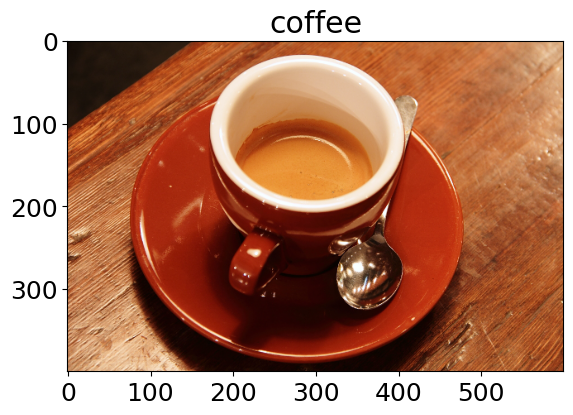

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from skimage import data

matplotlib.rcParams['font.size'] = 18

images = (
    'coffee',
)


for name in images:
    caller = getattr(data, name)
    image = caller()
    plt.figure()
    plt.title(name)
    if image.ndim == 2:
        plt.imshow(image, cmap=plt.cm.gray)
    else:
        plt.imshow(image)

plt.show()

**Task2**

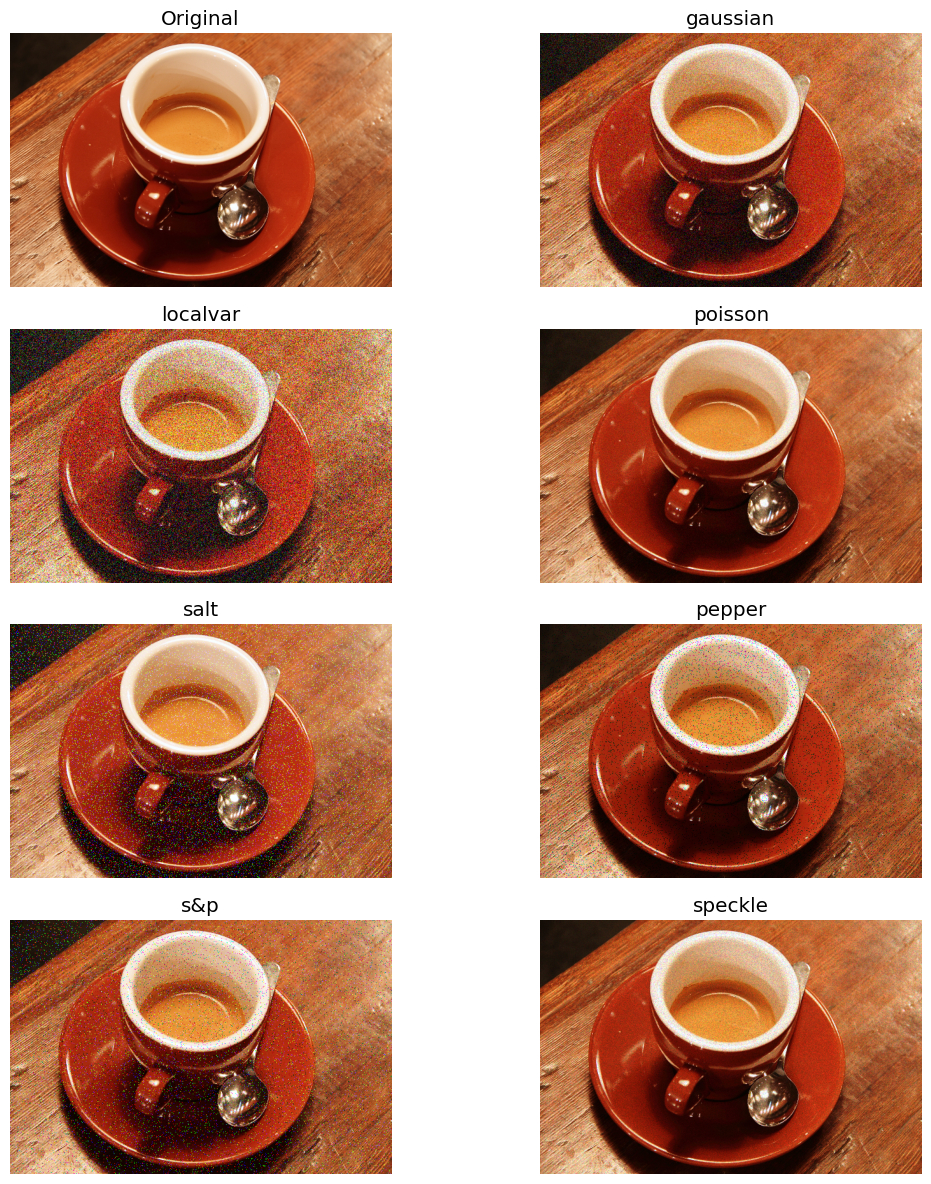

In [3]:
from skimage import data, util

matplotlib.rcParams['font.size'] = 12

image = data.coffee()

noise_types = [
    None,
    'gaussian',
    'localvar',
    'poisson',
    'salt',
    'pepper',
    's&p',
    'speckle'
]

images = [image]
titles = ['Original']

# Generate local variance array for 'localvar' noise
local_var = np.random.rand(*image.shape) * 0.1

for noise in noise_types[1:]:
    if noise == 'localvar':
        noisy = util.random_noise(image, mode=noise, local_vars=local_var)
    else:
        noisy = util.random_noise(image, mode=noise)
    # Clip if needed (though random_noise already keeps [0, 1])
    noisy = np.clip(noisy, 0, 1)
    images.append(noisy)
    titles.append(noise)

# Create 4x2 panel
fig, axes = plt.subplots(4, 2, figsize=(12, 12))
axes = axes.ravel()

for i in range(8):
    axes[i].imshow(images[i])
    axes[i].set_title(titles[i])
    axes[i].axis('off')

plt.tight_layout()
plt.show()

**Task3**

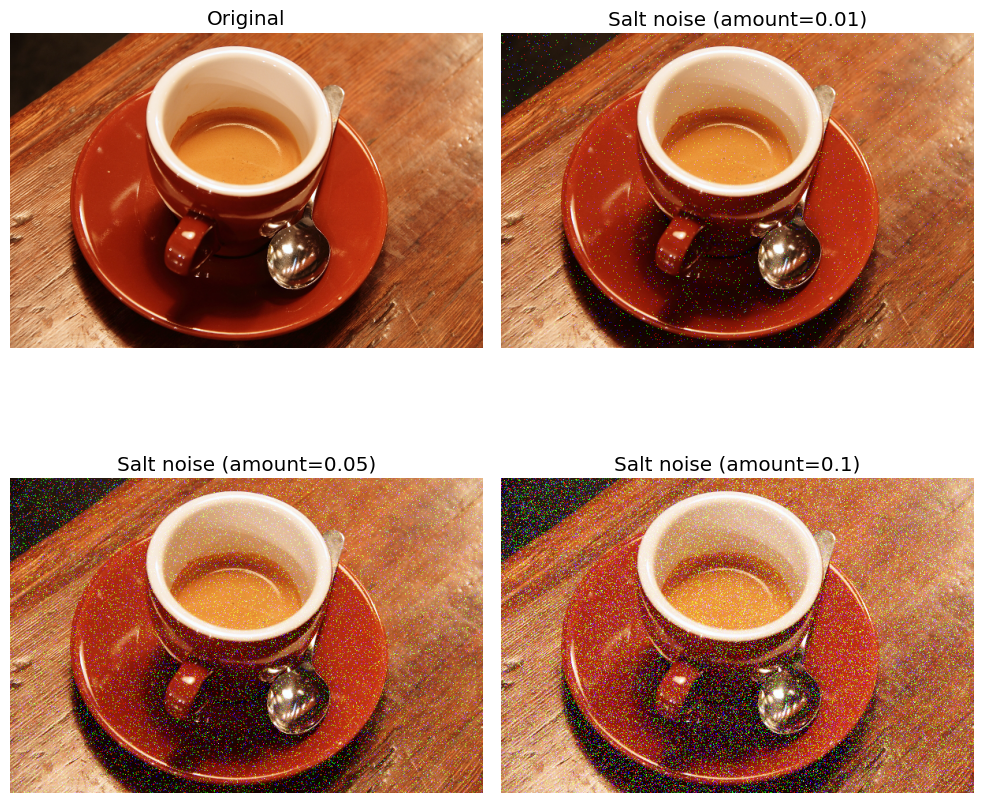

In [5]:
matplotlib.rcParams['font.size'] = 12

# Load original image
image = data.coffee()

# Define different intensities of salt noise
amounts = [0.01, 0.05, 0.1]  # Low, medium, high

# Generate noisy images
images = [image]  # Start with original
titles = ['Original']

for amt in amounts:
    noisy = util.random_noise(image, mode='salt', amount=amt)
    images.append(noisy)
    titles.append(f'Salt noise (amount={amt})')

# Plot in a 2x2 figure
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.ravel()

for i in range(4):
    axes[i].imshow(images[i])
    axes[i].set_title(titles[i])
    axes[i].axis('off')

plt.tight_layout()
plt.show()

**Task4**

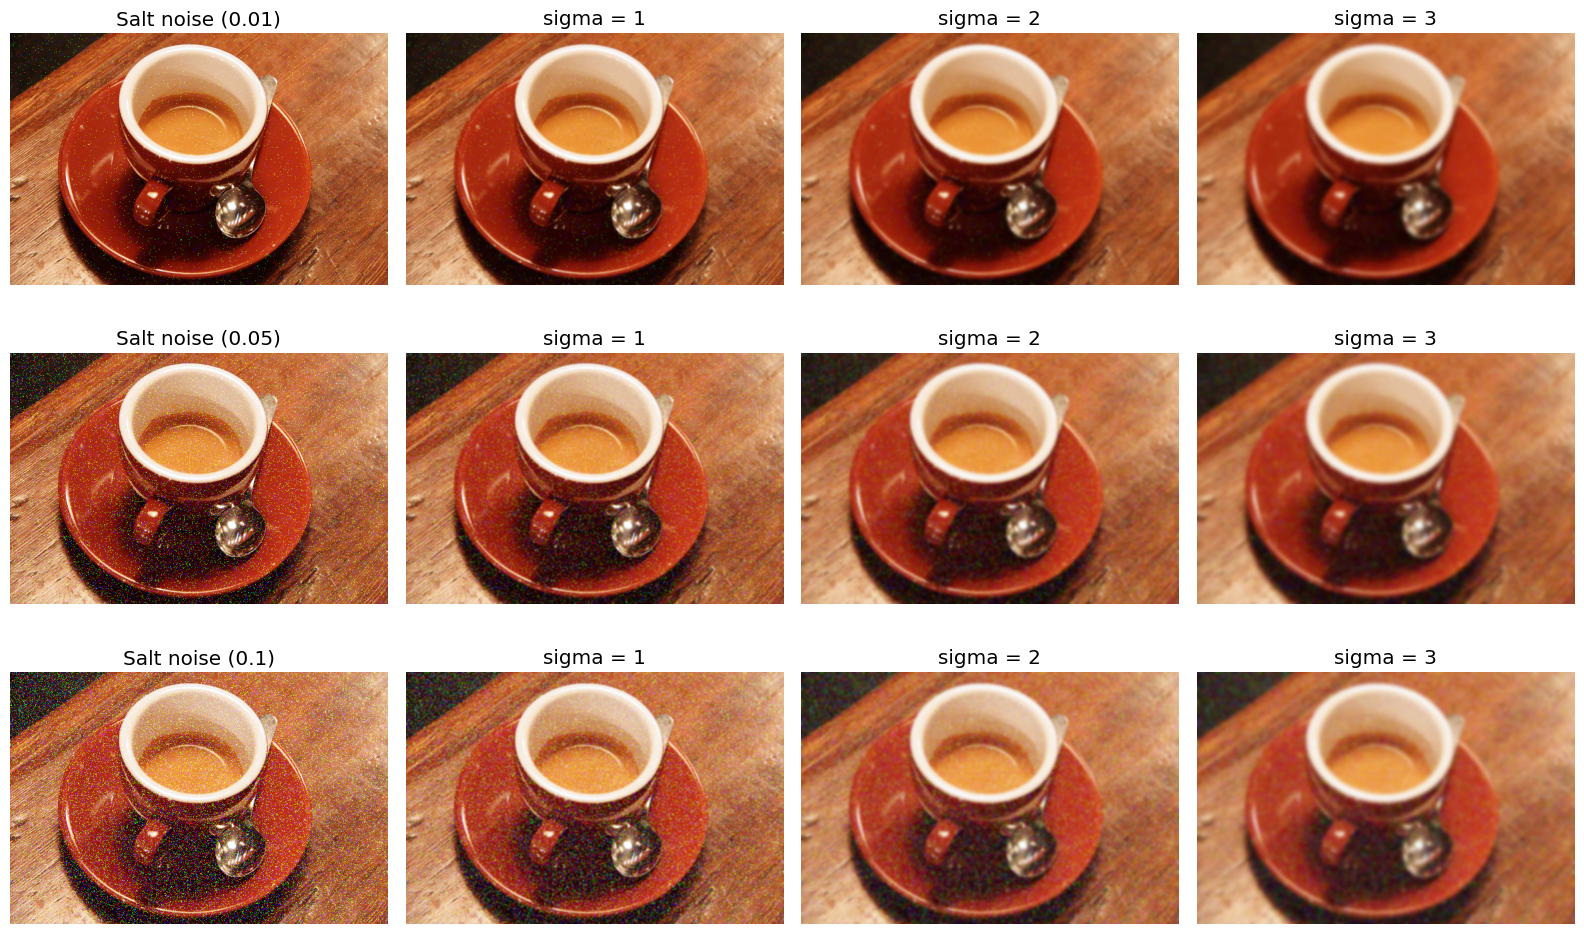

In [6]:
from skimage import data, util, filters

matplotlib.rcParams['font.size'] = 12

image = data.coffee()

amounts = [0.01, 0.05, 0.1]
noisy_images = [util.random_noise(image, mode='salt', amount=a) for a in amounts]

sigmas = [1, 2, 3]

# Prepare figure: 3 noisy images × (original + 3 sigma levels) = 4 columns
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))

for row, noisy in enumerate(noisy_images):
    axes[row, 0].imshow(noisy)
    axes[row, 0].set_title(f'Salt noise ({amounts[row]})')
    axes[row, 0].axis('off')

    for col, sigma in enumerate(sigmas):
        blurred = filters.gaussian(noisy, sigma=sigma, channel_axis=-1)
        axes[row, col + 1].imshow(blurred)
        axes[row, col + 1].set_title(f'sigma = {sigma}')
        axes[row, col + 1].axis('off')

plt.tight_layout()
plt.show()

**Task5**

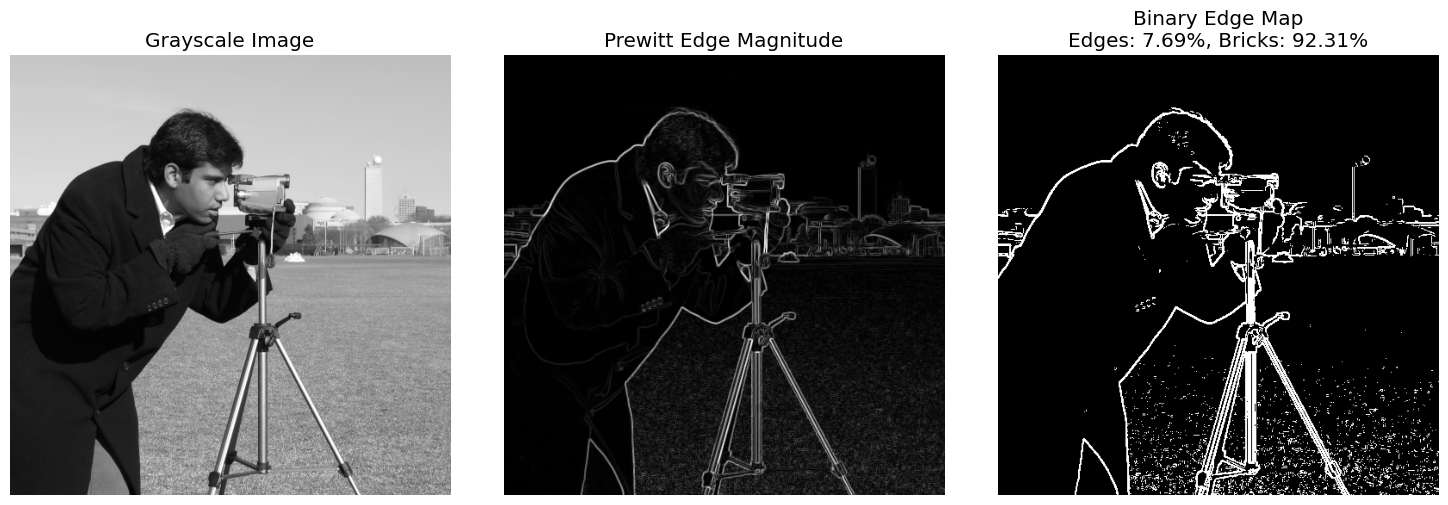

In [15]:
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, color, filters

from skimage import io
image = data.camera()
if image.ndim == 3:
    gray = color.rgb2gray(image)
else:
    gray = image

edges = filters.prewitt(gray)

# Threshold to create a binary edge map
threshold = 0.1
binary_edges = edges > threshold

# Compute pixel fractions
total_pixels = gray.size
edge_pixels = np.sum(binary_edges)
brick_pixels = total_pixels - edge_pixels

edge_fraction = edge_pixels / total_pixels
brick_fraction = brick_pixels / total_pixels

# Display results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(gray, cmap='gray')
axes[0].set_title("Grayscale Image")
axes[0].axis('off')

axes[1].imshow(edges, cmap='gray')
axes[1].set_title("Prewitt Edge Magnitude")
axes[1].axis('off')

axes[2].imshow(binary_edges, cmap='gray')
axes[2].set_title(f"Binary Edge Map\n"
                  f"Edges: {edge_fraction:.2%}, Bricks: {brick_fraction:.2%}")
axes[2].axis('off')

plt.tight_layout()
plt.show()